### king country 주택 가격 데이터셋(2014~2015)

- 분석 목표 : price 예측

- 집의 건설 연도, 침실개수, 방 넓이등의 데이터를 활용한 다중 회귀 사용

#### 성능 측정 지표 선택

- 회귀 문제의 성능 지표는 보통 **평균 제곱근 오차(RMSE(root mean square error)** 사용<br>
> 오차가 커질수록 rmse 값은 더 커지며 커질수록 오류가 많음

- 이상치로 보이는 구역이 많을 경우 **평균 절대 오차(MAE(mean absolute error)**도 사용

- 두 방법 모두 예측값의 벡터와 타겟의 벡터 사이의 거리를 재는 방법

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kc_country = pd.read_csv('D:\Portfolio\hands on machine learning dataset\kc_house_data.csv')

In [3]:
kc_country.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 데이터 탐색
- 1. 데이터 수 확인<br>
- 2. 결측값 확인


In [4]:
# 데이터셋 행수,컬럼수 확인
kc_country.shape

(21613, 21)

In [5]:
# 21613개의 관측값 확인
kc_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


### 데이터 설명

**ID** : unique id<br>
**date** : date when the house were sold<br>
**price** : the price of the house<br>
**bedrooms** : number of bedrooms<br>
**bathrooms** : number of bathrooms<br>
**sqft_living** : square footage of living area<br>
**sqft_lot** : square footage of total land space<br>
**floors** : numbers of floors<br>
**waterfront** : explain whether the house faces the waterfront or not<br>
**view** : levels of view the house has in 1 - 4<br>
**condition** : the condition of the house<br>
**grade**<br>
**sqft_above** : square footage of a house that is above the ground (main floor + upper)<br>
**sqft_basement** : square footage of a house below the ground<br>
**yr_built** : the year when the house were built<br>
**yr_renovated** : the year when the house were renovated<br>
**zipcode** : zipcode area of the house<br>
**lat** : latitude<br>
**long** ; longitude<br>
**sqft_living15**<br>
**sqft_lot15**

In [6]:
# 데이터내의 결측값 확인
# 데이터 내의 결측값은 없다.
kc_country.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# 변수값 summarise
kc_country.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
kc_country.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


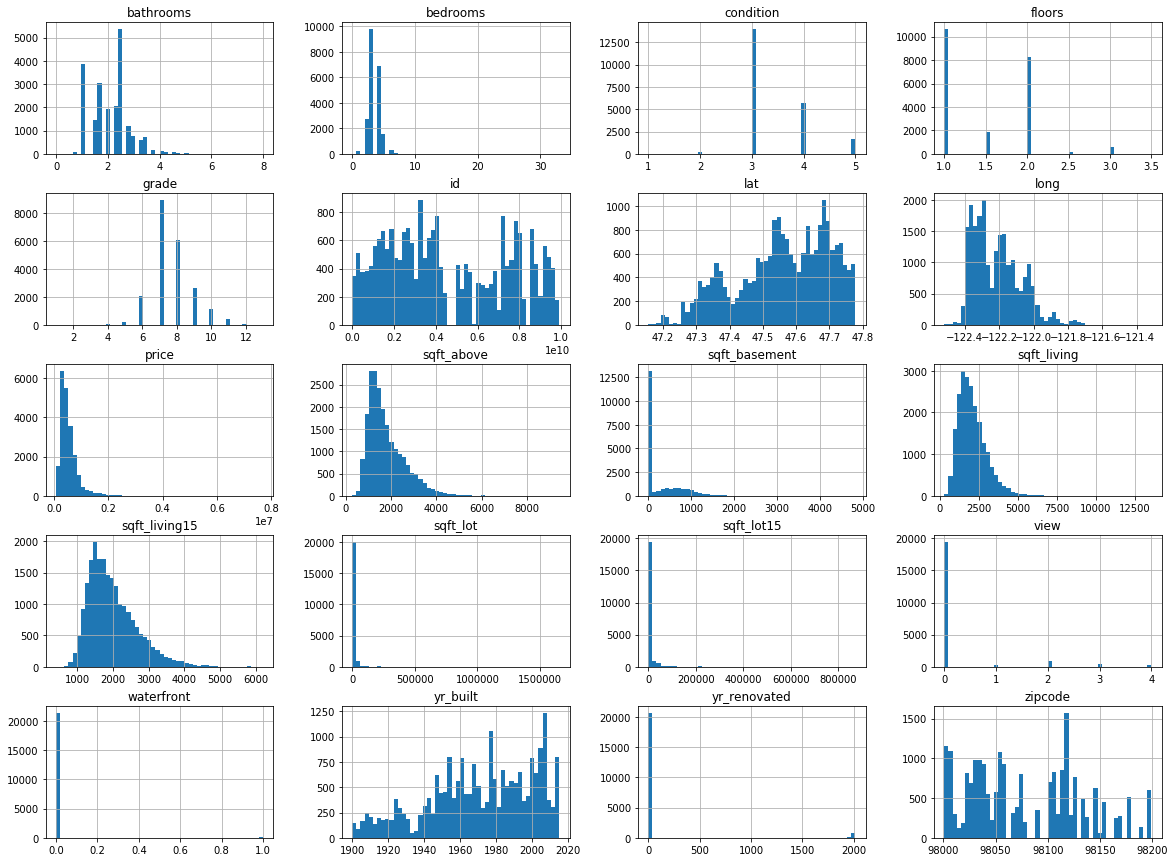

In [9]:
# 히스토그램
kc_country.hist(bins = 50, figsize = (20,15))
plt.show()

view,waterfront의 0이 아닌 빈도수가 굉장히 적다.

In [10]:
print("집이 보이는 수준 : \n", kc_country.view.value_counts())
print("해안가 방향을 바라보고 있는 집 : \n",kc_country.waterfront.value_counts())

집이 보이는 수준 : 
 0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64
해안가 방향을 바라보고 있는 집 : 
 0    21450
1      163
Name: waterfront, dtype: int64


In [11]:
# 시간 데이터 변환 - utc시간대에서 년-월-일로
def time_change(string) : 
    year = string[:4]
    month = string[4:6]
    day = string[6:8]
    time = year + '-' + month + '-' + day
    return time
time_change(kc_country.loc[0]['date'])
kc_country['date'] = kc_country['date'].apply(lambda x : time_change(x))

In [12]:
kc_country['date']

0        2014-10-13
1        2014-12-09
2        2015-02-25
3        2014-12-09
4        2015-02-18
5        2014-05-12
6        2014-06-27
7        2015-01-15
8        2015-04-15
9        2015-03-12
10       2015-04-03
11       2014-05-27
12       2014-05-28
13       2014-10-07
14       2015-03-12
15       2015-01-24
16       2014-07-31
17       2014-05-29
18       2014-12-05
19       2015-04-24
20       2014-05-14
21       2014-08-26
22       2014-07-03
23       2014-05-16
24       2014-11-20
25       2014-11-03
26       2014-06-26
27       2014-12-01
28       2014-06-24
29       2015-03-02
            ...    
21583    2014-06-10
21584    2014-12-02
21585    2014-08-28
21586    2014-10-15
21587    2015-03-05
21588    2014-11-13
21589    2014-09-10
21590    2014-05-14
21591    2014-10-02
21592    2015-04-16
21593    2015-03-17
21594    2014-10-17
21595    2014-10-31
21596    2014-08-13
21597    2015-04-21
21598    2014-10-13
21599    2014-09-15
21600    2014-10-15
21601    2015-04-07


In [13]:
kc_country.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
from sklearn.model_selection import train_test_split